# 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

# 2. 데이터 이해

In [2]:
path = 'https://raw.githubusercontent.com/jangrae/csv/master/boston.csv'
data = pd.read_csv(path)
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. 데이터 준비

#### 1) x,y 분리

In [4]:
target = 'medv'

x = data.drop(target, axis=1)
y = data[target]

#### 2) x 정규화

In [5]:
x = (x - x.min()) / (x.max() - x.min())

#### 3) train,test 분리

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=2022)

# 4. 모델링

#### 1) Random Forest

In [19]:
# 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [20]:
# 선언하기
model = RandomForestRegressor(max_depth=10, random_state=2022)

In [21]:
# 학습하기
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=2022)

In [22]:
# 예측하기
y_pred = model.predict(x_test)

In [23]:
# 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2.465881455087647
r2-score : 0.8454412226909755


In [24]:
# 최적 모델 성능 확인
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

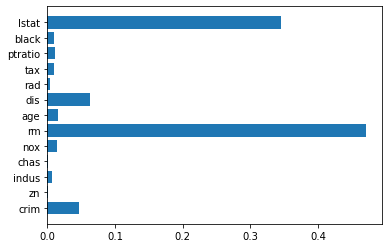

In [26]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)

plt.show()

#### 2) XGBoost

In [27]:
# 불러오기
from xgboost import XGBRegressor

In [28]:
# 선언하기
model = XGBRegressor(max_depth=10, random_state=2022)

In [29]:
# 학습하기
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# 예측하기
y_pred = model.predict(x_test)

In [31]:
# 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2.4090699515844647
r2-score : 0.8463536896732412


In [32]:
# 최적 모델 성능 확인
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

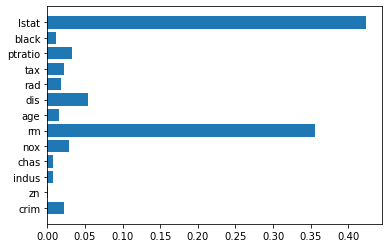

In [33]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)

plt.show()

# 5. 튜닝

#### 1) Random Search

In [35]:
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth':range(3,11,1), 'n_estimators':range(10,151,10)}
param

{'max_depth': range(3, 11), 'n_estimators': range(10, 151, 10)}

In [36]:
model_xgb = XGBRegressor()

model = RandomizedSearchCV(model_xgb,         # 기존 모델
                           param,             # 파라미터
                           cv=10,             # k-fold의 k
                           n_iter=15,         # random search 몇 개 뽑을지
                           scoring='r2')      # 평가 기준

model.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predict

In [37]:
y_pred = model.predict(x_test)

In [38]:
# 최적 파라미터
print(model.best_params_)

# 최적 파라미터의 r2
print(model.best_score_)

{'n_estimators': 40, 'max_depth': 10}
0.8679485755650335


In [40]:
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2.4106587478989048
r2-score : 0.8463431843975374


#### 2) Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

param = {'max_depth':range(8,15,1), 'n_estimators':range(30,101,10)}
param

{'max_depth': range(8, 15), 'n_estimators': range(30, 101, 10)}

In [42]:
model_xgb = XGBRegressor()

model = GridSearchCV(model_xgb,
                     param,
                     cv=10,
                     scoring='r2')

model.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [43]:
y_pred = model.predict(x_test)

In [44]:
# 최적 파라미터
print(model.best_params_)

# 최적 파라미너의 성능
print(model.best_score_)

{'max_depth': 10, 'n_estimators': 40}
0.8679485755650335


In [47]:
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2.4106587478989048
r2-score : 0.8463431843975374


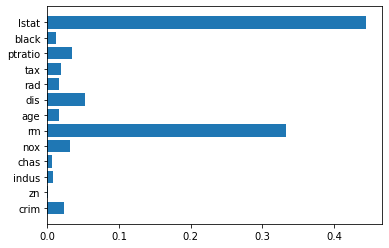

In [51]:
# 변수별 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)

plt.show()